In [1]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

import warnings
warnings.filterwarnings('ignore')

C:\Users\Gaurav\anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
class MySMAStrategy(Strategy):
    def init(self): # This is not a constructor
        price = self.data.Close # This helps us to get the closing price for the day
        self.ma1 = self.I(SMA, price, 10) # This reflects to 10 day Moving average
        self.ma2 = self.I(SMA, price, 20)
        
    def next(self):
        if crossover(self.ma1, self.ma2): # Crossover function Returns True if series1 just crossed over(above) series2.
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


backtest = Backtest(GOOG, MySMAStrategy, commission = 0.002, exclusive_orders = True)
stats = backtest.run()

In [3]:
print(stats)

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  68221.96986
Equity Peak [$]                   68991.21986
Return [%]                         582.219699
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.266427
Volatility (Ann.) [%]               38.383008
Sharpe Ratio                         0.658271
Sortino Ratio                        1.288779
Calmar Ratio                         0.763748
Max. Drawdown [%]                  -33.082172
Avg. Drawdown [%]                   -5.581506
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                        54.255319
Best Trade [%]                       57.11931
Worst Trade [%]                    -16.629898
Avg. Trade [%]                    

In [4]:
backtest.plot()

Row(id='1450', ...)

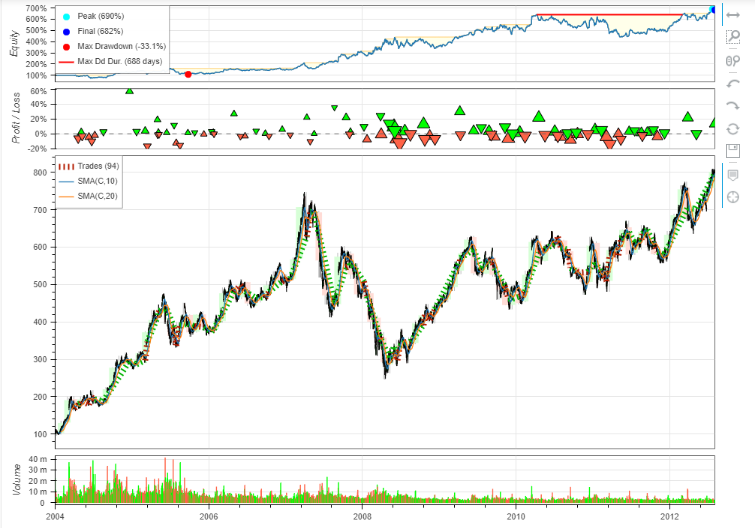

 - In the above chart, every dashed line show a trade.
 - The triangles in the profit/loss section shows the profit and losses. Green means we made money while red shows we lost.
 - We also have the volume section which indicates the volume of shares.